В этой лабораторной работе будут задействованы полносвязные слои. Необходимо решить ряд задач с их помощью.  Набор библиотек: tensorflow, numpy, matplotlib, random

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Классификация генерированных данных

Первая задача - классификация генерированных данных. Для начала сформируйте датасет по следующему принципу: первая группа точек (первый класс) распределена по площади круга радиусом 0.8, вторая группа - по площади кольца с R=2 и r=1. Суммарное количество точек N=1000, соотношение классов - 1:1.

По заданным условиям сгенерируйте две координаты для каждой точки как случайные величины, набор этих координат занесите в массив X_train. Каждой точке из этого массива должен соответствовать лейбл класса - его занесите в y_train. Постройте график распределения.

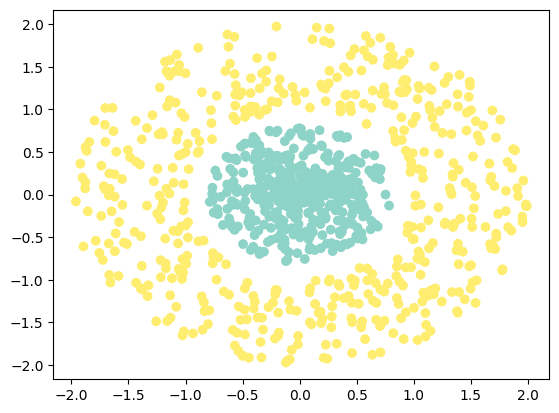

In [ ]:
np.random.seed(0)


def make_ring(r_inner, r_outer, n_samples=1000):
    r = np.random.uniform(size=(n_samples, 1), low=r_inner, high=r_outer)
    theta = np.random.uniform(size=(n_samples, 1), low=0, high=np.pi * 2)
    X = np.hstack([r * np.cos(theta), r * np.sin(theta)])
    return X


X_train_1 = make_ring(r_inner=0, r_outer=0.8, n_samples=500)
y_train_1 = np.zeros(shape=(500, 1), dtype=int)

X_train_2 = make_ring(r_inner=1, r_outer=2, n_samples=500)
y_train_2 = np.ones(shape=(500, 1), dtype=int)

X_train = np.vstack([X_train_1, X_train_2])
y_train = np.vstack([y_train_1, y_train_2])

plt.scatter(x=X_train[:, 0], y=X_train[:, 1], c=y_train, cmap="Set3")
plt.show()

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)

Классифицируйте эти данные с помощью трех разных моделей, использующих полносвязные слои. Для всех моделей используйте метрику accuracy. Первая модель должна иметь не более двух слоев (включая выходной) и по два нейрона в каждом слое. Во второй модели добавьте к первому слою ещё один нейрон. Последнюю модель составляйте по своему усмотрению с целью максимально быстро добиться 100% точности.

In [ ]:
# Модель 1
model_1 = tf.keras.Sequential(
    [tf.keras.layers.Dense(2, activation="relu"), tf.keras.layers.Dense(2)]
)
model_1.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model_1.fit(X_train, y_train_onehot, epochs=5, batch_size=10)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5457 - loss: 0.6066
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6843 - loss: 0.6047
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6959 - loss: 0.6029
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7127 - loss: 0.5891
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5872


In [ ]:
# Модель 2
model_2 = tf.keras.Sequential(
    [tf.keras.layers.Dense(3, activation="relu"), tf.keras.layers.Dense(2)]
)
model_2.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model_2.fit(X_train, y_train_onehot, epochs=5, batch_size=10)

Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4882 - loss: 0.6933
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5942 - loss: 0.6742
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6555 - loss: 0.6563
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.6449
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.6242


In [ ]:
# Модель 3
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(12, activation="relu"),
        tf.keras.layers.Dense(8, activation="relu"),
        tf.keras.layers.Dense(2),
    ]
)
model_3.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model_3.fit(X_train, y_train_onehot, epochs=10, batch_size=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5363 - loss: 0.6588
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6390 - loss: 0.5963
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7475 - loss: 0.5060
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8619 - loss: 0.4166
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9366 - loss: 0.3241
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9779 - loss: 0.2595
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.1971
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9990 - loss: 0.1462
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1062
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0996


Теперь добавьте к данным случайные отклонения по координатам таким образом, чтобы точки двух классов смешивались на границе. Для этого, например, можно добавить к генератору координат слагаемое, разыгранное функцией Гаусса, но принимается любой рабочий вариант. Постройте график.

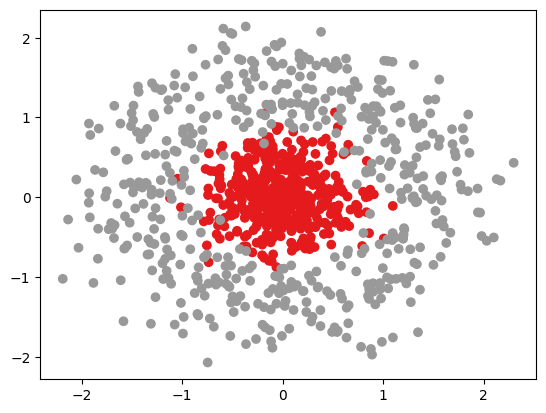

In [ ]:
def make_ring_new(r_inner, r_outer, r_std=0, n_samples=1000):
    r = np.random.uniform(
        size=(n_samples, 1), low=r_inner, high=r_outer
    ) + np.random.normal(loc=0, scale=r_std, size=(n_samples, 1))
    theta = np.random.uniform(size=(n_samples, 1), low=0, high=np.pi * 2)
    X = np.hstack([r * np.cos(theta), r * np.sin(theta)])
    return X


X_train_1 = make_ring_new(r_inner=0, r_outer=0.8, r_std=0.2, n_samples=500)
X_train_2 = make_ring_new(r_inner=1, r_outer=2, r_std=0.2, n_samples=500)


y_train_1 = np.zeros(shape=(500, 1), dtype=int)
y_train_2 = np.ones(shape=(500, 1), dtype=int)

X_train_new = np.vstack([X_train_1, X_train_2])
y_train_new = np.vstack([y_train_1, y_train_2])

plt.scatter(x=X_train_new[:, 0], y=X_train_new[:, 1], c=y_train_new, cmap="Set1")
plt.show()

In [ ]:
y_train_onehot_new = tf.keras.utils.to_categorical(y_train_new, num_classes=2)

К этим данным примените третью модель.

In [ ]:
model_3.fit(X_train_new, y_train_onehot_new, epochs=10, batch_size=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.1149
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9739 - loss: 0.1040
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1130
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.1056
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.1208
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9657 - loss: 0.0884
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9615 - loss: 0.0927
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9654 - loss: 0.0927
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9555 - loss: 0.1037
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0.0932


# MNIST

Теперь решите задачу классификации для датасета MNIST. Загрузите его любым удобным способом и обучите FC-модель. Точность выше 90% считается удовлетворительной.

In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_train, X_test = X_train / 255, X_test / 255

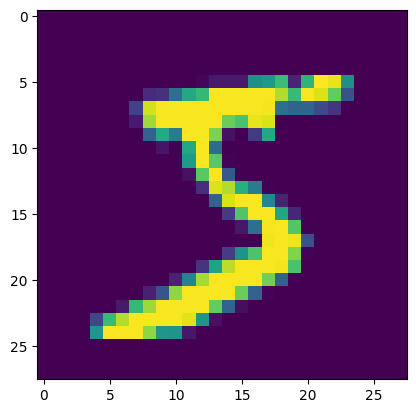

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_train_onehot

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10),
    ]
)
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)
model.fit(X_train, y_train_onehot, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8241 - loss: 0.5888
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9321 - loss: 0.2317
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9440 - loss: 0.1859
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9509 - loss: 0.1643
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9534 - loss: 0.1511
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1383
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9606 - loss: 0.1307
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9604 - loss: 0.1267
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9619 - loss: 0.1179
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9626 - loss: 0.1191


In [ ]:
model.evaluate(X_test, y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1070


[0.09087371826171875, 0.9739999771118164]